link do dataset -> https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

ESTUDO DE APOIO PARA  ARTISTAS MUSICAIS - Spotify
----

Tópicos
---
Pesquisar esse tópics com control + f :

- Contextualização do objetivo de negócio
- Tratamento dos dados
- Modelo de Knn
- Modelo de K-Means
- Modelo da Árvore de Decisão
- Modelo de Regressão Linear ( estamos trabalhando nele...)
- BANCO DE DADOS E ENGENHARIA DE SOFTWARE
  - Ação
  - Predicado
  - Funções de estado
- Engenharia de Software

integrantes:
--

Thiago Rodrigues

Vinicius Perez

Carlos Eduardo
             
Giovana Soares

Contextualização do objetivo de negócio:
---

Imagine um cantor ou uma banda que não está tendo o engajamento esperado/desejado com suas músicas. Este projeto simulará um estudo feito com os TopHits do Spotify desde 2000 até 2019. ​

   O objetivo é estudar o que as músicas que alcançaram uma maior popularidade possuem em comum, assim guiaremos este cantor ou banda a produzir suas próximas músicas com base nos maiores sucessos estudados. ​

### Tratamento dos dados

In [1]:
import pandas as pd
tophits_df = pd.read_csv('songs_normalize.csv', sep=',')

In [2]:
#ordenando por ano 
tophits_df = tophits_df.sort_values(by = 'year')

In [3]:
#entendendo a correlação
tophits_df.corr()
#energy e loudness é a maior correlação com 0.651

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


array([[<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

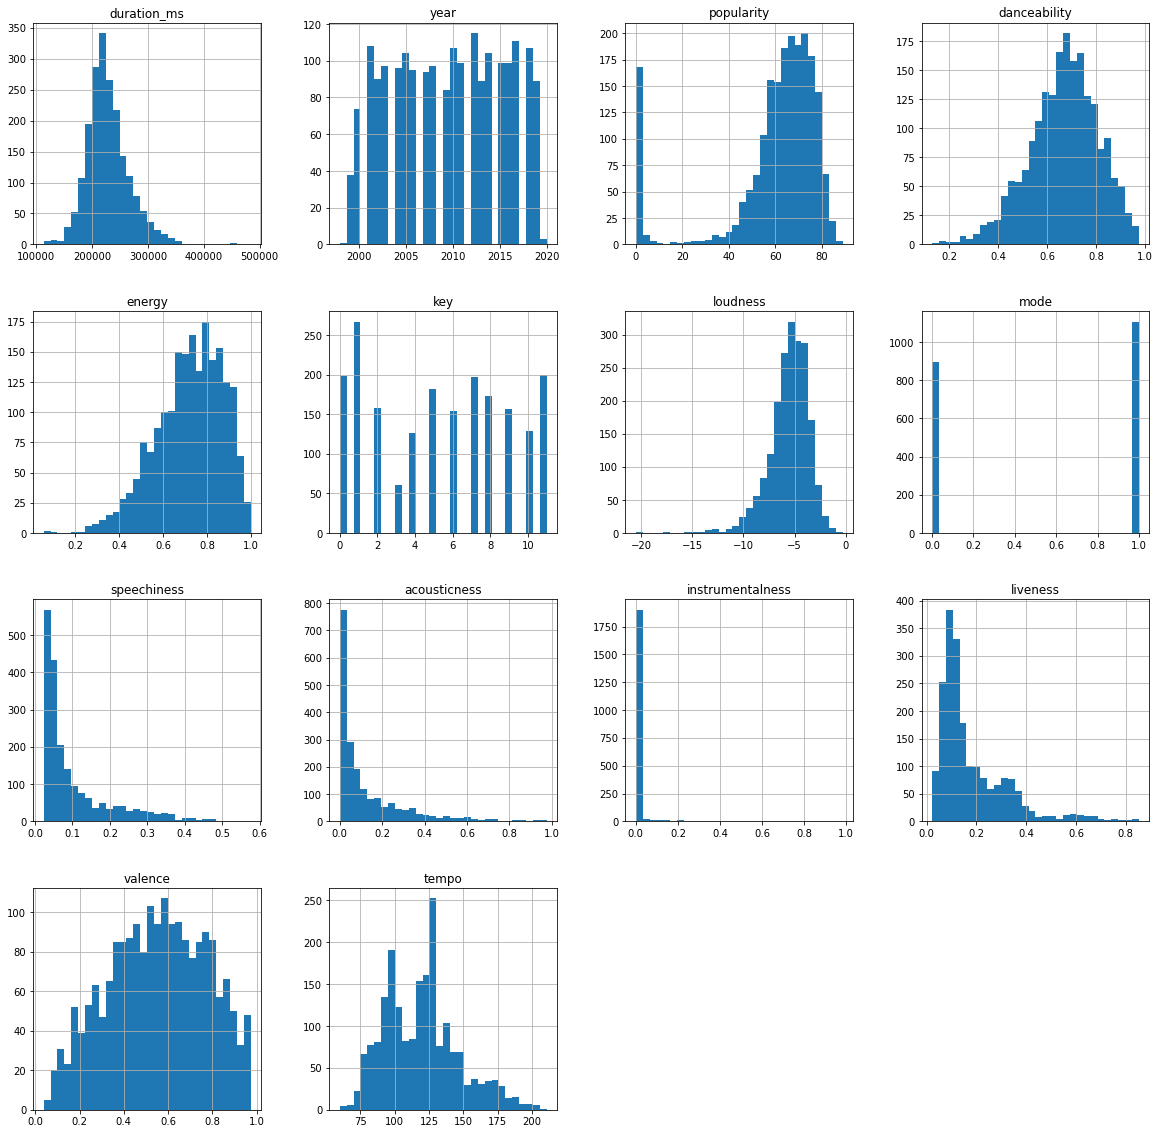

In [4]:
#entendendo a distribuição dos dados
tophits_df.hist(bins=30 , figsize=(20,20))

In [5]:
print( tophits_df['popularity'].max() )
print( tophits_df['popularity'].min() )
print( tophits_df['popularity'].mean() )

89
0
59.8725


In [6]:
#curiosidade: qual/quais é/são a(s) música(s) com a(s) maior(es) popularidade(s)? 
tophits_df[tophits_df['popularity']== 89]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


In [7]:
#e a(s) de menor(es) popularide?
tophits_df[tophits_df['popularity']== 0]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
182,Musiq Soulchild,Love,304666,False,2000,0,0.569,0.385,1,-9.919,0,0.0499,0.342000,0.000000,0.0876,0.339,99.738,"pop, R&B"
59,Oasis,Go Let It Out,278666,False,2000,0,0.408,0.849,2,-5.631,1,0.0333,0.013600,0.000025,0.5600,0.628,84.192,"Folk/Acoustic, rock"
185,Basement Jaxx,Romeo,217493,False,2001,0,0.713,0.829,2,-4.171,1,0.0491,0.007690,0.002030,0.1390,0.844,126.853,"pop, Dance/Electronic"
126,Jennifer Lopez,Ain't It Funny,246160,False,2001,0,0.707,0.869,5,-4.525,0,0.0481,0.104000,0.000121,0.0813,0.621,99.825,"hip hop, pop, R&B"
363,Electric Six,Danger! High Voltage - Soulchild Radio Mix,214600,False,2003,0,0.660,0.698,11,-4.722,0,0.0302,0.000019,0.166000,0.0517,0.511,123.005,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,G-Eazy,No Limit,245386,True,2017,0,0.838,0.771,1,-3.791,1,0.2440,0.011700,0.000000,0.0853,0.405,175.957,"hip hop, pop"
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.002840,0.074600,0.0685,0.275,129.006,Dance/Electronic
1913,NLE Choppa,Shotta Flow (feat. Blueface) [Remix],176631,True,2019,0,0.894,0.511,2,-4.768,1,0.4200,0.025100,0.000000,0.1400,0.568,120.080,hip hop
1922,Mabel,Mad Love,169813,False,2019,0,0.631,0.803,0,-2.974,0,0.1550,0.675000,0.000000,0.1100,0.620,198.065,"pop, Dance/Electronic"


In [8]:
#transformando os dados da coluna 'duration_ms' de milisegundo para segundo (divdir por mil)
segundos = []
for s in tophits_df['duration_ms']:
    seg = (s/1000)
    segundos.append(seg)

In [9]:
tophits_df['duration_seg'] = segundos

In [10]:
#excluindo a coluna dos milisegundos
tophits_df = tophits_df.drop(['duration_ms'], axis=1)
tophits_df

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_seg
44,Missy Elliott,Hot Boyz,True,1998,49,0.727,0.445,1,-11.241,1,0.2910,0.33900,0.000000,0.1800,0.527,81.125,"hip hop, pop, R&B",215.466
82,Savage Garden,Crash and Burn,False,1999,54,0.581,0.607,4,-8.458,1,0.0280,0.18900,0.000002,0.0882,0.213,102.030,pop,281.466
123,Crazy Town,Butterfly,False,1999,71,0.736,0.811,9,-4.170,0,0.0810,0.00132,0.000142,0.1070,0.609,103.502,"rock, metal",216.733
34,Britney Spears,Born to Make You Happy,False,1999,58,0.633,0.922,11,-4.842,0,0.0454,0.11600,0.000465,0.0710,0.686,84.110,pop,243.533
35,Montell Jordan,Get It On Tonite,False,1999,59,0.813,0.491,10,-9.923,0,0.0770,0.24100,0.000046,0.0817,0.868,99.008,"hip hop, pop, R&B",276.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Lil' Kim,Magic Stick,True,2019,47,0.849,0.498,2,-7.872,1,0.2720,0.11600,0.000045,0.2680,0.502,92.980,"hip hop, pop, R&B",359.973
1999,Post Malone,Circles,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop,215.280
568,Will Smith,Switch,False,2020,34,0.873,0.900,5,-4.325,0,0.1800,0.01070,0.000502,0.5560,0.478,102.516,"hip hop, pop",197.666
308,t.A.T.u.,All The Things She Said,True,2020,39,0.527,0.834,5,-5.767,0,0.0474,0.04110,0.005990,0.1050,0.381,179.920,pop,214.440


In [16]:
#transformadno a coluna 'explicit' --> False: 0, True: 1
tophits_df['explicit'] = tophits_df['explicit'].apply(lambda x:1 if x == True else 0)

In [12]:
#duplicando a tabela para diferentes manipulações do mesmo
tophits_df2 = tophits_df.copy() 

In [13]:
#reiniciando o index da tabela 1
tophits_df = tophits_df.reset_index()

Modelo de Knn
----

Objetivo: dado uma música (ponto do gráfico) encontrar músicas com caracteristicas semelhantes á ela (pontos vizinhos), simulando o que seria o algoritimo de recomendados do spotify.

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [15]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = tophits_df["artist"] + " - " + tophits_df["song"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = tophits_df[chosen].values
y = tophits_df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

amarelo = danceabilidade alta
roxo = danceabilidade baixa

In [16]:
#esse dataframe mostra as coordenadas de todas as músicas
df_coord = pd.DataFrame(X,text1)
df_coord.iloc[[1440,  742, 1267, 1457,  771, 1131]]
#df_coord

,0,1,2
Avicii - The Nights,-0.111680,0.211433,-0.098556
Santana - Into the Night (feat. Chad Kroeger),-0.096834,0.205357,-0.108256
David Guetta - Where Them Girls At (feat. Nicki Minaj & Flo Rida),-0.091663,0.206365,-0.086215
David Guetta - Lovers on the Sun (feat. Sam Martin),-0.104852,0.235852,-0.086259
Seether - Fake It,-0.147185,0.209277,-0.123220
Florence + The Machine - Spectrum (Say My Name) - Calvin Harris Remix,-0.116378,0.223786,-0.140260


In [17]:
#local onde eu coloco as coordenadas e o código devolve as músicas relacionadas
neigh = NearestNeighbors(n_neighbors=6)
neigh.fit(X)
print(neigh.kneighbors([[-0.11168,0.211433, -0.098556]]))

(array([[6.42483814e-07, 1.87457832e-02, 2.40557786e-02, 2.81801582e-02,
        4.32848843e-02, 4.37475517e-02]]), array([[1440,  742, 1267, 1457,  771, 1131]], dtype=int64))


In [18]:
tophits_df.iloc[[1440,  742, 1267, 1457,  771, 1131]]

,index,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_seg
1440,1514,Avicii,The Nights,0,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic",176.658
742,864,Santana,Into the Night (feat. Chad Kroeger),0,2007,57,0.595,0.844,7,-4.678,1,0.0331,0.01370,0.000000,0.2340,0.603,127.981,"rock, blues, latin",222.440
1267,1116,David Guetta,Where Them Girls At (feat. Nicki Minaj & Flo R...,1,2012,72,0.666,0.876,3,-3.078,1,0.0414,0.05500,0.000000,0.2590,0.552,129.884,"hip hop, pop, Dance/Electronic",194.840
1457,1411,David Guetta,Lovers on the Sun (feat. Sam Martin),0,2014,50,0.645,0.891,6,-2.505,0,0.0387,0.09320,0.000004,0.3790,0.568,124.915,"hip hop, pop, Dance/Electronic",203.520
771,738,Seether,Fake It,1,2007,73,0.611,0.950,8,-3.509,1,0.0518,0.00141,0.000002,0.0543,0.607,132.078,"rock, metal",193.893
1131,1236,Florence + The Machine,Spectrum (Say My Name) - Calvin Harris Remix,0,2011,68,0.578,0.946,11,-3.850,0,0.0482,0.00225,0.004120,0.0966,0.588,126.092,"rock, pop, Dance/Electronic",218.190


### Modelo de K-Means

objetivo: Algorítmo usado para ‘clusterizar’ as músicas em mais populares e menos populares. 

In [19]:
#excluindo os atributos não numéricos 
tophits_df = tophits_df.drop(['song', 'artist'], axis=1)

In [20]:
#excluindo os atributos que não serão trabalhados pelo algorítmo
tophits_df = tophits_df.drop(['year', 'tempo', 'key', 'mode', 'genre','index'], axis=1)

###### Definindo o nº de clusters pelo Elbow Method

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tophits_scaled = scaler.fit_transform(tophits_df)

In [22]:
tophits_scaled[4].min(), tophits_scaled[4].max()

(-2.281722056120562, 1.4325068158404395)

In [23]:
tophits_scaled

array([[ 1.62165473, -0.50972229,  0.42429082, ..., -0.00864513,
        -0.11181453, -0.33946374],
       [-0.61665408, -0.27531333, -0.61573369, ..., -0.66140319,
        -1.53385823,  1.34736031],
       [-0.61665408,  0.52167715,  0.48840192, ..., -0.52772289,
         0.2595472 , -0.30708183],
       ...,
       [-0.61665408, -1.21294917,  1.46431534, ...,  2.66496087,
        -0.3337258 , -0.79439508],
       [ 1.62165473, -0.97854021, -1.00040029, ..., -0.5419442 ,
        -0.77301956, -0.36568619],
       [ 1.62165473, -0.13466795,  1.20074748, ..., -0.54905486,
         0.95245385,  0.28964496]])

###### Elbow Method

In [24]:
from sklearn.cluster import KMeans

wcss_1 = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tophits_scaled)
    wcss_1.append(kmeans.inertia_)
    
wcss_1

[21999.999999999978,
 19186.116076241473,
 17188.10835318925,
 15965.195979383507,
 14528.817099636564,
 13258.671530407604,
 12586.889428196773,
 11841.772868530279,
 11429.339733192179,
 11046.98058601936,
 10713.403830992867,
 10443.474907101001,
 10163.562863908279,
 9920.264865684403,
 9739.050536390492,
 9556.726921130175,
 9360.682521097775,
 9226.516924896447,
 9075.083069263694,
 8932.31598112113]

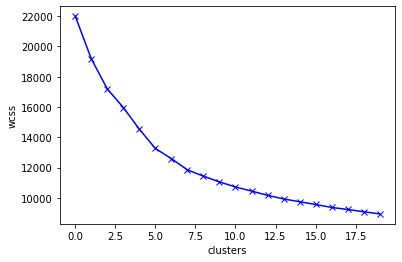

In [25]:
#observar a partir de qual cluster não há mais quedas acentuadas no valor do wcss
import matplotlib.pyplot as plt

plt.plot(wcss_1, 'bx-')
plt.xlabel('clusters')
plt.ylabel('wcss');

#8 clusters

In [26]:
###### Agrupamento com KMeans

In [27]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(tophits_scaled)

labels = kmeans.labels_

In [28]:
#grupo de cada música
labels

array([7, 4, 5, ..., 0, 3, 3])

In [29]:
#alocou todas as músicas
len(labels)

2000

In [30]:
#quantidade de músicas por grupo
import numpy as np 

np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([191, 430, 168, 279, 178, 519,  31, 204], dtype=int64))

###### Centroids de cada grupo // Atributo médio de cada grupo

In [31]:
kmeans.cluster_centers_

array([[-2.88525037e-01,  5.33501298e-02, -3.65144697e-01,
         6.82279857e-01,  5.67609535e-01, -1.00171962e-01,
        -3.43156623e-01, -1.39527635e-01,  2.12894411e+00,
         3.38552266e-01, -1.86799878e-01],
       [-6.01037968e-01,  3.26627083e-01, -7.93041472e-01,
         1.67422204e-01,  1.24669343e-01, -4.43196137e-01,
        -3.42481084e-01, -8.85437595e-02, -1.44238696e-01,
        -7.82659586e-01,  1.36951002e-01],
       [-3.04303412e-02, -2.72907286e+00,  8.18985386e-02,
        -1.44022998e-02,  1.81669387e-04, -1.34469873e-01,
        -1.17171256e-01, -8.64670417e-02, -1.67441280e-01,
        -2.30931465e-02, -3.36609166e-01],
       [ 1.62165473e+00,  3.80695698e-01,  5.76079152e-01,
        -2.52131056e-01, -3.91220399e-02, -8.30557966e-02,
        -1.39003896e-01, -1.53554536e-01, -2.26585412e-01,
        -9.61422755e-02,  1.22604120e-01],
       [-3.90308242e-01,  1.99562358e-01, -4.53094797e-01,
        -1.55111328e+00, -1.35785035e+00, -2.91775147e-01,
  

In [32]:
cluster_centers_df = pd.DataFrame(data = kmeans.cluster_centers_, columns = [tophits_df.columns])
cluster_centers_df

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_seg
0,-0.288525,0.053350,-0.365145,0.682280,0.567610,-0.100172,-0.343157,-0.139528,2.128944,0.338552,-0.186800
1,-0.601038,0.326627,-0.793041,0.167422,0.124669,-0.443196,-0.342481,-0.088544,-0.144239,-0.782660,0.136951
2,-0.030430,-2.729073,0.081899,-0.014402,0.000182,-0.134470,-0.117171,-0.086467,-0.167441,-0.023093,-0.336609
3,1.621655,0.380696,0.576079,-0.252131,-0.039122,-0.083056,-0.139004,-0.153555,-0.226585,-0.096142,0.122604
4,-0.390308,0.199562,-0.453095,-1.551113,-1.357850,-0.291775,2.149103,-0.116891,-0.355066,-0.740753,0.157369
5,-0.595090,0.249329,0.496239,0.375005,0.301557,-0.250965,-0.195056,-0.100558,-0.366601,0.822811,-0.260438
6,-0.544451,-0.314634,0.144868,0.068369,-0.700942,-0.360750,0.011512,7.378834,-0.162855,-0.181631,-0.183327
7,1.281520,0.227747,0.269006,-0.246039,-0.216755,2.200200,-0.050913,-0.164979,0.025775,0.063867,0.548884


In [33]:
#os dados acima são complicados para analisar
#fazendo o escalonamento inverso
cluster_centers_df = scaler.inverse_transform(cluster_centers_df)
cluster_centers_df

array([[ 1.46596859e-01,  6.10104712e+01,  6.16178010e-01,
         8.24554974e-01, -4.41524607e+00,  9.39376963e-02,
         6.94849984e-02,  2.98261141e-03,  4.80617801e-01,
         6.26445026e-01,  2.21439246e+02],
       [ 6.97674419e-03,  6.68395349e+01,  5.56109302e-01,
         7.45932558e-01, -5.27144884e+00,  6.09611628e-02,
         6.96020709e-02,  7.45638407e-03,  1.60930930e-01,
         3.78871395e-01,  2.34106577e+02],
       [ 2.61904762e-01,  1.66071429e+00,  6.78934524e-01,
         7.18166667e-01, -5.51208333e+00,  9.06404762e-02,
         1.08648846e-01,  7.63861351e-03,  1.57667857e-01,
         5.46590476e-01,  2.15577690e+02],
       [ 1.00000000e+00,  6.79928315e+01,  7.48308244e-01,
         6.81863799e-01, -5.58805735e+00,  9.55831541e-02,
         1.04865194e-01,  1.75176796e-03,  1.49350179e-01,
         5.30460573e-01,  2.33545229e+02],
       [ 1.01123596e-01,  6.41292135e+01,  6.03831461e-01,
         4.83500000e-01, -8.13715730e+00,  7.55179775e-02,
  

In [34]:
cluster_centers_df = pd.DataFrame(data = cluster_centers_df, columns = [tophits_df.columns])
cluster_centers_df

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_seg
0,0.146597,61.010471,0.616178,0.824555,-4.415246,0.093938,0.069485,0.002983,0.480618,0.626445,221.439246
1,0.006977,66.839535,0.556109,0.745933,-5.271449,0.060961,0.069602,0.007456,0.160931,0.378871,234.106577
2,0.261905,1.660714,0.678935,0.718167,-5.512083,0.090640,0.108649,0.007639,0.157668,0.546590,215.577690
3,1.000000,67.992832,0.748308,0.681864,-5.588057,0.095583,0.104865,0.001752,0.149350,0.530461,233.545229
4,0.101124,64.129213,0.603831,0.483500,-8.137157,0.075518,0.501400,0.004969,0.131281,0.388125,234.905478
5,0.009634,65.190751,0.737100,0.777632,-4.929526,0.079441,0.095151,0.006402,0.129659,0.733374,218.558031
6,0.032258,53.161290,0.687774,0.730806,-6.867355,0.068887,0.130950,0.662710,0.158313,0.511584,221.575129
7,0.848039,64.730392,0.705201,0.682794,-5.931422,0.315083,0.120132,0.000749,0.184841,0.565792,250.224176


In [35]:
#GRUPOS COM MAIORES POPULARIDADES
cluster_centers_bons = cluster_centers_df.drop([3, 5, 7], axis=0)
cluster_centers_bons

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_seg
0,0.146597,61.010471,0.616178,0.824555,-4.415246,0.093938,0.069485,0.002983,0.480618,0.626445,221.439246
1,0.006977,66.839535,0.556109,0.745933,-5.271449,0.060961,0.069602,0.007456,0.160931,0.378871,234.106577
2,0.261905,1.660714,0.678935,0.718167,-5.512083,0.090640,0.108649,0.007639,0.157668,0.546590,215.577690
4,0.101124,64.129213,0.603831,0.483500,-8.137157,0.075518,0.501400,0.004969,0.131281,0.388125,234.905478
6,0.032258,53.161290,0.687774,0.730806,-6.867355,0.068887,0.130950,0.662710,0.158313,0.511584,221.575129


In [36]:
#GRUPOS COM MENORES POPULARIDADES
cluster_centers_ruins = cluster_centers_df.drop([0, 1, 2, 4, 6], axis=0)
cluster_centers_ruins

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_seg
3,1.000000,67.992832,0.748308,0.681864,-5.588057,0.095583,0.104865,0.001752,0.149350,0.530461,233.545229
5,0.009634,65.190751,0.737100,0.777632,-4.929526,0.079441,0.095151,0.006402,0.129659,0.733374,218.558031
7,0.848039,64.730392,0.705201,0.682794,-5.931422,0.315083,0.120132,0.000749,0.184841,0.565792,250.224176


###### Adicionando os grupos nas músicas

In [37]:
tophits_df_clusterizado = pd.concat([tophits_df, pd.DataFrame({'cluster' : labels})], axis=1)
tophits_df_clusterizado

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_seg,cluster
0,1,49,0.727,0.445,-11.241,0.2910,0.33900,0.000000,0.1800,0.527,215.466,7
1,0,54,0.581,0.607,-8.458,0.0280,0.18900,0.000002,0.0882,0.213,281.466,4
2,0,71,0.736,0.811,-4.170,0.0810,0.00132,0.000142,0.1070,0.609,216.733,5
3,0,58,0.633,0.922,-4.842,0.0454,0.11600,0.000465,0.0710,0.686,243.533,5
4,0,59,0.813,0.491,-9.923,0.0770,0.24100,0.000046,0.0817,0.868,276.266,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,47,0.849,0.498,-7.872,0.2720,0.11600,0.000045,0.2680,0.502,359.973,7
1996,0,85,0.695,0.762,-3.497,0.0395,0.19200,0.002440,0.0863,0.553,215.280,5
1997,0,34,0.873,0.900,-4.325,0.1800,0.01070,0.000502,0.5560,0.478,197.666,0
1998,1,39,0.527,0.834,-5.767,0.0474,0.04110,0.005990,0.1050,0.381,214.440,3


### Modelo da Árvore de Decisão

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report,f1_score,accuracy_score
from sklearn import metrics
import pickle
from sklearn import tree
import graphviz
import warnings
warnings.filterwarnings("ignore")

In [39]:
X1 = tophits_df2.drop(['artist', 'song', 'key', 'mode', 'tempo', 'genre', 'year','popularity'], axis=1)
y = tophits_df2['popularity']
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3,random_state=42)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1400, 10) (600, 10) (1400,) (600,)


In [41]:
arvore = DecisionTreeRegressor()
arvore = arvore.fit(X_train, y_train)
arvore

DecisionTreeRegressor()

In [42]:
pickle.dump(arvore, open('arvore.pkl', 'wb'))
pickled_arvore = pickle.load(open('arvore.pkl', 'rb'))
pickled_arvore = pickled_arvore.predict(X_test)

In [43]:
#Média da popularidade das musícas
tophits_df['popularity'].mean()

59.8725

In [44]:
#Exemplo - Prever se a musica tem altas ou baixas chances de ser popular
variaveis_musica = [0,0.872,0.444,-15.345,0.693,0.23,0.001678,0.0901,0.609,300.289]
variaveis_musica = np.array(variaveis_musica)
variaveis_musica = arvore.predict([variaveis_musica])
variaveis_musica

array([69.])

In [45]:
print(f"r2_score: {metrics.r2_score(y_test,pickled_arvore)}")
print(f'mean_squared_error: {np.sqrt(mean_squared_error(y_test, pickled_arvore))}')
print(f"f1_score: {metrics.f1_score(y_test,pickled_arvore, average='weighted')}")
print(f"recall_score: {metrics.recall_score(y_test,pickled_arvore,average='macro')}")
print(f"accuracy_score: {metrics.accuracy_score(y_test,pickled_arvore)}")

r2_score: -1.5152293239346268
mean_squared_error: 32.30779059814108
f1_score: 0.07696398228551092
recall_score: 0.053864285810112884
accuracy_score: 0.07333333333333333


In [46]:
if variaveis_musica >= (tophits_df['popularity'].mean()):
    print('A música tem ALTAS chances de ser POPULAR')
else: 
    print('A música tem BAIXAS chances de ser POPULAR')

A música tem ALTAS chances de ser POPULAR


In [47]:
dot_data = tree.export_graphviz(arvore, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=tophits_df['popularity'] ,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

### Modelo de Regressão Linear

In [48]:
from sklearn.linear_model import LinearRegression

# Cria um preditor regressão linear
linreg = LinearRegression()

In [49]:
X2 = tophits_df2.drop(['artist', 'song', 'key', 'mode', 'tempo', 'genre', 'year','popularity','danceability','liveness','duration_seg'], axis=1)
y2 = tophits_df2['danceability']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3,random_state=42)

In [50]:
linreg = linreg.fit(X_train, y_train)

In [51]:
pickle.dump(linreg, open('linreg.pkl', 'wb'))
pickled_linreg = pickle.load(open('linreg.pkl', 'rb'))
pickled_linreg = pickled_linreg.predict(X_test)

In [52]:
#Prevendo a danceabilidade de uma música
variaveis_musica = [0,0.424,-11.325,0.641,0.001117,0.509,0.289]
variaveis_musica = np.array(variaveis_musica)
variaveis_musica = linreg.predict([variaveis_musica])
variaveis_musica

array([0.68738657])

In [53]:
print(f"r2_score: {metrics.r2_score(y_test,pickled_arvore)}")
print(f'mean_squared_error: {np.sqrt(mean_squared_error(y_test, pickled_arvore))}')


r2_score: -183725.14708552393
mean_squared_error: 60.72891216621344


In [54]:
linreg.score(X_test,y_test)

0.3346277044654624

BANCO DE DADOS E ENGENHARIA DE SOFTWARE
--------

Modelo conceitual: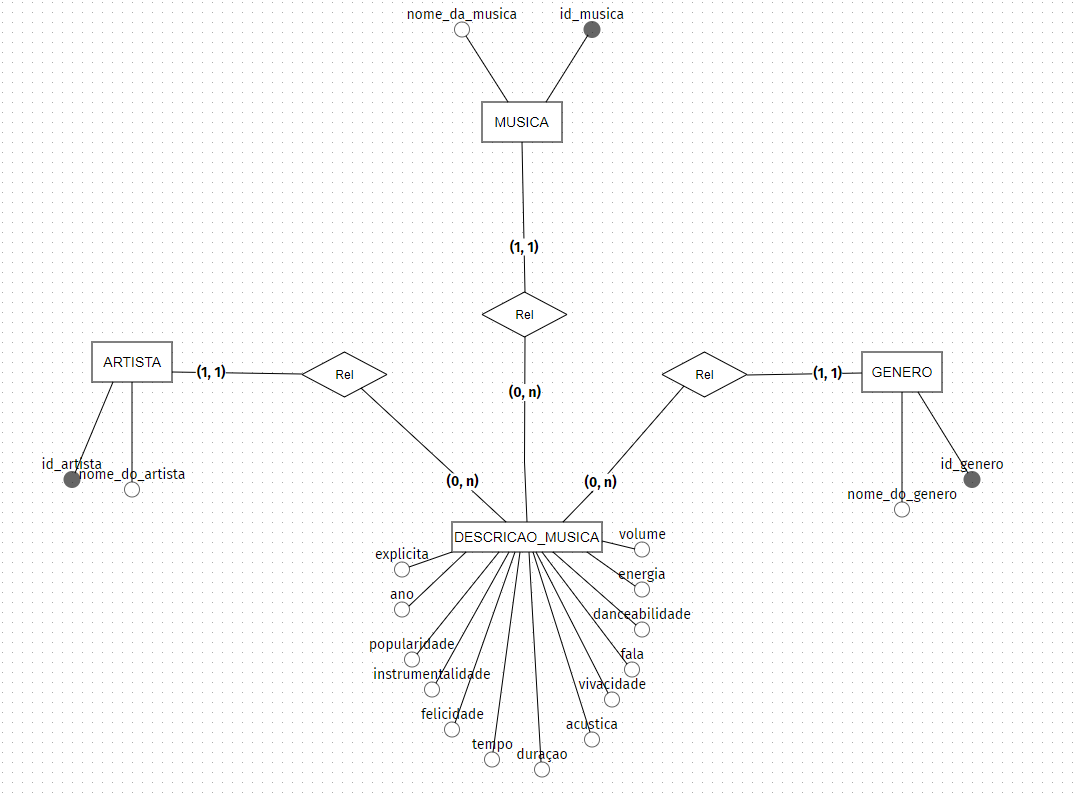

Modelo lógico: 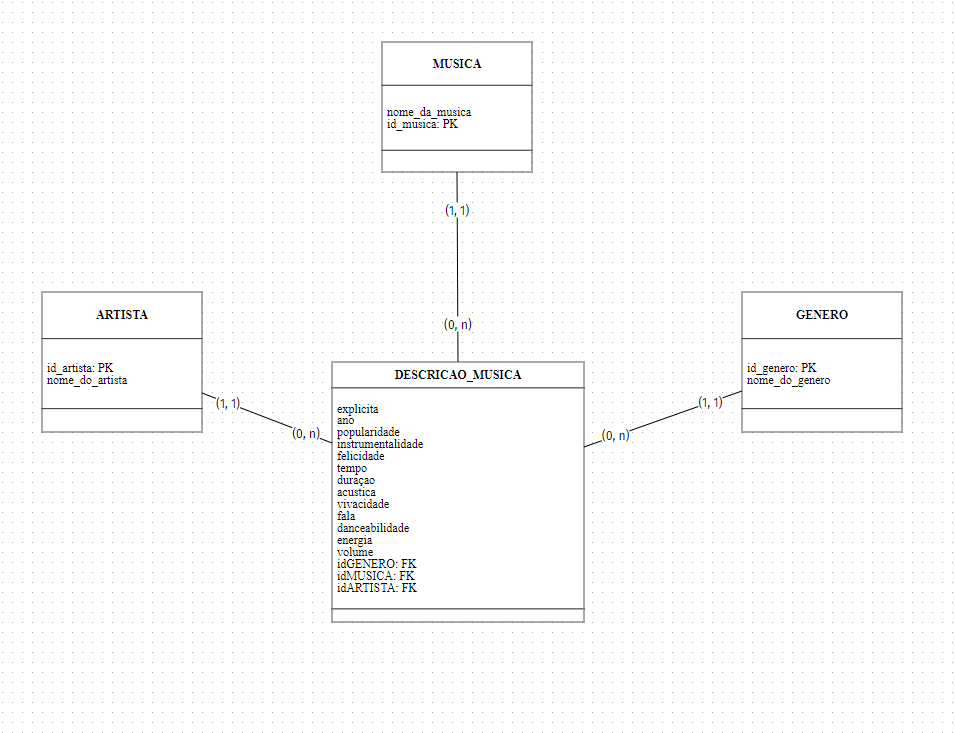

Modelo físico:

Funcionalidade do banco de dados: o sistema deve permitir que o artista possa identificar características comuns em músicas populares dos últimos 20 anos com a finalidade se espelhar e criar uma música com maiores chances de popularizar

In [55]:
import sqlite3
import os
os.remove('SPOTIFYY.db') if os.path.exists('SPOTIFYY.db') else None

In [56]:
dados = pd.read_csv('songs_normalize.csv',delimiter=",", encoding='latin1')

In [57]:
#transformando os dados da coluna 'duration_ms' de milisegundo para segundo (divdir por mil)
segundos = []
for s in dados['duration_ms']:
    seg = (s/1000)
    segundos.append(seg)

dados['duration_seg'] = segundos

#excluindo a coluna dos milisegundos
dados = dados.drop(['duration_ms'], axis=1)

In [58]:
conn = sqlite3.connect(('SPOTIFYY.db'))
cursor = conn.cursor()

In [59]:
cursor.execute("""CREATE TABLE artista (
                id_artista INTEGER PRIMARY KEY,
                nome_do_artista TEXT
                );""")

In [60]:
cursor.execute("""CREATE TABLE genero (
                id_genero int PRIMARY KEY,
                nome_do_genero text
                );""")

In [61]:
cursor.execute("""CREATE TABLE musica (
                id_musica int PRIMARY KEY,
                nome_da_musica TEXT
                );""")

In [62]:
cursor.execute("""CREATE TABLE descricao_musica (
                explicita TEXT,
                ano int,
                popularidade int,
                instrumentalidade real,
                felicidade real,
                tempo real,
                duracao real,
                acustica real,
                vivacidade real,
                fala real, 
                danceabilidade real,
                energia real,
                volume real,
                idartista,
                idgenero,
                idmusica,
                FOREIGN KEY(idgenero) REFERENCES genero (id_genero),
                FOREIGN KEY(idartista) REFERENCES artista (id_artista),
                FOREIGN KEY(idmusica) REFERENCES musica (id_musica)
                );""")

In [63]:
lista_nome_artista = []
for x in range(len(dados)):
    a = dados.iloc[x][0]
    lista_nome_artista.append(a)
    
lista_nome_artista = np.array(lista_nome_artista)
lista_nome_artista = np.unique(lista_nome_artista)
lista_id_artista = []

for x in range(len(lista_nome_artista)):
    lista_id_artista.append(x)
    
df_artista = pd.DataFrame.from_dict({'artist':lista_nome_artista, 'id_artista':lista_id_artista})
df_artista = dados.merge(df_artista, on = 'artist', how = 'left' )
df_artista = df_artista.sort_values(by='song')
df_artista

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_seg,id_artista
1439,The Chainsmokers,#SELFIE - Original Mix,False,2014,0,0.789,0.915,0,-3.263,1,0.2480,0.01350,0.000009,0.0818,0.660,127.955,"pop, Dance/Electronic",183.750,724
1315,will.i.am,#thatPOWER,False,2013,68,0.797,0.608,6,-6.096,0,0.0584,0.00112,0.000077,0.0748,0.402,127.999,"hip hop, pop",279.506,834
209,Eminem,'Till I Collapse,True,2002,85,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.100,171.447,hip hop,297.786,239
616,Sean Paul,(When You Gonna) Give It Up to Me (feat. Keysh...,False,2006,58,0.711,0.761,8,-3.040,1,0.2250,0.06700,0.000000,0.0410,0.718,95.824,"hip hop, pop",243.880,665
1758,Taylor Swift,...Ready For It?,False,2017,73,0.613,0.764,2,-6.509,1,0.1360,0.05270,0.000000,0.1970,0.417,160.015,pop,208.186,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,Ariana Grande,no tears left to cry,False,2018,77,0.699,0.713,9,-5.507,0,0.0594,0.04000,0.000003,0.2940,0.354,121.993,pop,205.920,53
1557,Jeremih,oui,False,2015,77,0.418,0.724,5,-3.724,1,0.0964,0.21300,0.000000,0.1120,0.604,78.521,"hip hop, pop, R&B",238.320,359
1801,Post Malone,rockstar (feat. 21 Savage),True,2018,83,0.585,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,hip hop,218.146,610
1843,girl in red,we fell in love in october,False,2018,82,0.566,0.366,7,-12.808,1,0.0280,0.11300,0.181000,0.1550,0.237,129.959,"pop, rock, Dance/Electronic",184.153,830


In [64]:
lista_nome_genero = []
for x in range(len(dados)):
    a = dados.iloc[x][16]
    lista_nome_genero.append(a)
    
lista_nome_genero = np.array(lista_nome_genero)
lista_nome_genero = np.unique(lista_nome_genero)
lista_id_genero = []

for x in range(len(lista_nome_genero)):
    lista_id_genero.append(x)

df_genero = pd.DataFrame.from_dict({'genre':lista_nome_genero, 'id_genero':lista_id_genero})
df_genero = dados.merge(df_genero, on = 'genre', how = 'left' )
df_genero = df_genero.sort_values(by='song')

In [65]:
lista_nome_musica = []
lista_id_musica = []

for x in range(len(dados)):
    a = dados.iloc[x][1]
    lista_nome_musica.append(a)
lista_nome_musica = np.array(lista_nome_musica)
lista_nome_musica = np.unique(lista_nome_musica)
lista_id_musica = []

for x in range(len(lista_nome_musica)):
    lista_id_musica.append(x)

df_musica = pd.DataFrame.from_dict({'song':lista_nome_musica, 'id_musica':lista_id_musica})
df_musica = dados.merge(df_musica, on = 'song', how = 'left' )
df_musica = df_musica.sort_values(by='song')

In [66]:
lista_artista = []
lista_artista_id = []
lista_musicas = []
lista_ano = []
lista_explicita = []
lista_popularidade = []
lista_instrumentalidade = []
lista_felicidade = []
lista_tempo = []
lista_duracao = []
lista_acustica = []
lista_vivacidade = []
lista_fala = []
lista_danceabilidade = []
lista_energia = []
lista_volume = []
lista_genero = []
lista_genero_id = []
lista_musica_id = []

for index, row in df_artista.iterrows():
    lista_artista.append(row['artist'])
    lista_artista_id.append(row['id_artista'])
    lista_ano.append(row['year'])
    lista_explicita.append(row['explicit'])
    lista_popularidade.append(row['popularity'])
    lista_instrumentalidade.append(row['instrumentalness'])
    lista_felicidade.append(row['liveness'])
    lista_tempo.append(row['tempo'])
    lista_duracao.append(row['duration_seg'])
    lista_acustica.append(row['acousticness'])
    lista_vivacidade.append(row['valence'])
    lista_fala.append(row['speechiness'])
    lista_danceabilidade.append(row['danceability'])
    lista_energia.append(row['energy'])
    lista_volume.append(row['loudness'])
for index, row in df_genero.iterrows():
    lista_genero.append(row['genre'])
    lista_genero_id.append(row['id_genero'])
for index, row in df_musica.iterrows():
    lista_musicas.append(row['song'])
    lista_musica_id.append(row['id_musica'])

In [67]:
for x in range(len(lista_id_artista)):
    cursor.execute("INSERT INTO artista (id_artista,nome_do_artista) VALUES (?,?)", (lista_id_artista[x],lista_nome_artista[x]))

In [68]:
for x in range(len(lista_id_musica)):
    cursor.execute("INSERT INTO musica (id_musica,nome_da_musica) VALUES (?,?)", (lista_id_musica[x],lista_nome_musica[x]))

In [69]:
for x in range(len(lista_id_genero)):
    cursor.execute("INSERT INTO genero (id_genero,nome_do_genero) VALUES (?,?)", (lista_id_genero[x],lista_nome_genero[x]))

In [70]:
for x in range(2000):
    cursor.execute("INSERT INTO descricao_musica (explicita,ano,popularidade,instrumentalidade,felicidade,tempo,duracao,acustica,vivacidade,fala,danceabilidade,energia,volume,idartista,idgenero,idmusica) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", (lista_explicita[x],lista_ano[x],lista_popularidade[x],lista_instrumentalidade[x],lista_felicidade[x],lista_tempo[x],lista_duracao[x],lista_acustica[x],lista_vivacidade[x],lista_fala[x],lista_danceabilidade[x],lista_energia[x],lista_volume[x],lista_artista_id[x],lista_genero_id[x],lista_musica_id[x]))

#### Aplicação da engenharia de software em banco de dados:



 cada coluna das tabelas relacionais do nosso banco de dado são considerados variáveis de estado

In [71]:
#Q1-Artista mais popular de cada ano
def read_from_db():
    cursor.execute("""SELECT descricao_musica.ano, artista.nome_do_artista, MAX(popularidade) 
    from descricao_musica INNER JOIN artista 
    on descricao_musica.idartista = artista.id_artista 
    group by descricao_musica.ano""")
    for x in cursor.fetchall():
        print(x)
read_from_db()

(1998, 'Missy Elliott', 49)
(1999, 'Dr. Dre', 82)
(2000, 'Eminem', 86)
(2001, 'Nickelback', 78)
(2002, 'Eminem', 87)
(2003, '50 Cent', 81)
(2004, 'Usher', 81)
(2005, 'Gorillaz', 82)
(2006, 'Nelly Furtado', 82)
(2007, 'Timbaland', 80)
(2008, 'Kanye West', 82)
(2009, 'JAY-Z', 82)
(2010, 'Justin Bieber', 81)
(2011, 'JAY-Z', 82)
(2012, 'Bruno Mars', 85)
(2013, 'The Neighbourhood', 89)
(2014, 'Avicii', 85)
(2015, 'WILLOW', 86)
(2016, 'Drake', 84)
(2017, 'Ed Sheeran', 85)
(2018, 'Billie Eilish', 86)
(2019, 'Post Malone', 85)
(2020, 'NSG', 57)


# Ação:

In [72]:
#Q2 - Deleta as musicas com ano inferior a 2000
def read_from_db():
    cursor.execute("""DELETE FROM descricao_musica where ano < 2000
    """)
    for x in cursor.fetchall():
        print(x)
read_from_db()

#### Com a ação DELETE, as musicas com o ano inferior a 2000, foram excluídas da tabela descricao_musica (resultado a baixo)

In [73]:
#Q1-Artista mais popular de cada ano
def read_from_db():
    cursor.execute("""SELECT descricao_musica.ano, artista.nome_do_artista, MAX(popularidade) 
    from descricao_musica INNER JOIN artista 
    on descricao_musica.idartista = artista.id_artista 
    group by descricao_musica.ano""")
    for x in cursor.fetchall():
        print(x)
read_from_db()

(2000, 'Eminem', 86)
(2001, 'Nickelback', 78)
(2002, 'Eminem', 87)
(2003, '50 Cent', 81)
(2004, 'Usher', 81)
(2005, 'Gorillaz', 82)
(2006, 'Nelly Furtado', 82)
(2007, 'Timbaland', 80)
(2008, 'Kanye West', 82)
(2009, 'JAY-Z', 82)
(2010, 'Justin Bieber', 81)
(2011, 'JAY-Z', 82)
(2012, 'Bruno Mars', 85)
(2013, 'The Neighbourhood', 89)
(2014, 'Avicii', 85)
(2015, 'WILLOW', 86)
(2016, 'Drake', 84)
(2017, 'Ed Sheeran', 85)
(2018, 'Billie Eilish', 86)
(2019, 'Post Malone', 85)
(2020, 'NSG', 57)


# Predicado:

In [74]:
#Q3-Explicitude das musicas do ano de 2019 
def read_from_db():
    cursor.execute("""SELECT nome_da_musica, CASE WHEN descricao_musica.explicita is 1 THEN 'TRUE' ELSE 'FALSE' END
                      from musica INNER JOIN descricao_musica 
                      on descricao_musica.idmusica = musica.id_musica
                      where ano = 2019
                      group by musica.nome_da_musica""")
    for x in cursor.fetchall():
        print(x)
read_from_db()

('7 rings', 'TRUE')
('Adan y Eva', 'FALSE')
('All Day And Night', 'FALSE')
('Antisocial (with Travis Scott)', 'FALSE')
('Beautiful People', 'FALSE')
('Better Than Me', 'FALSE')
('Boasty (feat. Idris Elba)', 'TRUE')
('Boy With Luv (feat. Halsey)', 'FALSE')
('Callaita', 'TRUE')
('China', 'FALSE')
('Circles', 'FALSE')
('Clout (feat. Cardi B)', 'TRUE')
('Con Calma', 'FALSE')
('Crazy', 'FALSE')
('Cross Me (feat. Chance the Rapper & PnB Rock)', 'TRUE')
('Cruel Summer', 'FALSE')
('Dance Monkey', 'FALSE')
('Dancing With A Stranger (with Normani)', 'FALSE')
("Doin' Time", 'TRUE')
("Don't Call Me Up", 'FALSE')
("Don't Start Now", 'FALSE')
('EARFQUAKE', 'TRUE')
('Easier', 'FALSE')
("Giant (with Rag'n'Bone Man)", 'FALSE')
('Goodbyes (Feat. Young Thug)', 'TRUE')
('Hot Girl Summer (feat. Nicki Minaj & Ty Dolla $ign)', 'TRUE')
('How Do You Sleep?', 'FALSE')
("If I Could Go! (feat. Lil' Mo & Sacario)", 'FALSE')
('Juicy', 'TRUE')
('Just A Little', 'FALSE')
('Keisha & Becky - Remix', 'TRUE')
('Kill This

# Funções de estado:

In [75]:
#Q4 - Qantidade de musicas com o mesmo nome
def read_from_db():
    cursor.execute("""SELECT descricao_musica.idmusica, musica.nome_da_musica, COUNT(nome_da_musica) as qtd
    from descricao_musica INNER JOIN musica 
    on descricao_musica.idmusica = musica.id_musica
    group by descricao_musica.idmusica
    order by qtd DESC""")
    for x in cursor.fetchall():
        print(x)
read_from_db()

(1450, 'Sorry', 5)
(1296, 'Rise', 3)
(1009, 'Mercy', 3)
(810, "It's My Life", 3)
(713, 'I Like It', 3)
(477, 'Faded', 3)
(402, "Don't", 3)
(298, 'Closer', 3)
(1872, 'lovely (with Khalid)', 2)
(1843, 'You Know You Like It', 2)
(1839, "You Don't Own Me (feat. G-Eazy)", 2)
(1818, 'Work It', 2)
(1815, 'Work', 2)
(1809, 'Without Me', 2)
(1808, 'With You', 2)
(1803, 'Wings', 2)
(1789, 'White Flag', 2)
(1787, 'Wherever You Will Go', 2)
(1771, "When I'm Gone", 2)
(1768, 'Whatever You Like', 2)
(1766, 'Whatcha Say', 2)
(1764, "What's My Name?", 2)
(1757, 'What You Know', 2)
(1739, 'We Found Love', 2)
(1674, 'Try', 2)
(1658, 'Too Lost In You', 2)
(1616, 'The Way You Move (feat. Sleepy Brown)', 2)
(1593, 'The Middle', 2)
(1584, 'The Heart Wants What It Wants', 2)
(1559, 'Team', 2)
(1552, 'Talking Body', 2)
(1551, 'Talk Dirty (feat. 2 Chainz)', 2)
(1502, 'Suga Suga', 2)
(1497, 'Style', 2)
(1484, 'Stole the Show', 2)
(1478, 'Stickwitu', 2)
(1477, 'Stereo Love - Radio Edit', 2)
(1461, 'Spotlight', 2

(1276, 'Rehab', 1)
(1275, 'ReggaetÃ³n Lento (Remix)', 1)
(1274, 'Red Lights', 1)
(1273, 'Ready or Not', 1)
(1272, 'Ready For Your Love', 1)
(1271, 'Read Your Mind', 1)
(1270, 'Read All About It, Pt. III', 1)
(1269, 'Read All About It', 1)
(1268, 'Rather Be (feat. Jess Glynne)', 1)
(1267, 'Rapture (feat.Nadia Ali)', 1)
(1266, 'Ransom', 1)
(1265, 'Rake It Up (feat. Nicki Minaj)', 1)
(1264, 'Raise Your Glass', 1)
(1263, 'Rainy Dayz', 1)
(1262, 'Rain On Me', 1)
(1261, 'Radioactive', 1)
(1260, 'Radio', 1)
(1259, 'Rack City', 1)
(1258, 'R.I.P. (feat. Tinie Tempah)', 1)
(1257, 'Put Your Hands Up for Detroit - Radio Edit', 1)
(1256, 'Put Your Hands Up For Detroit - Radio Edit', 1)
(1255, 'Put That Woman First', 1)
(1254, 'Put On', 1)
(1253, 'Push The Button', 1)
(1252, 'Purple Pills', 1)
(1251, 'Pure Water (with Migos)', 1)
(1250, 'Pure Shores', 1)
(1249, 'Pumped Up Kicks', 1)
(1248, 'Pump It', 1)
(1247, "Pullin' Me Back", 1)
(1246, 'Psycho (feat. Ty Dolla $ign)', 1)
(1245, 'Proper Education -

(721, 'I Luv Your Girl', 1)
(720, 'I Love You', 1)
(719, 'I Love It (feat. Charli XCX)', 1)
(718, 'I Love It', 1)
(717, 'I Love College', 1)
(716, 'I Like The Way - Radio Edit', 1)
(715, 'I Like That', 1)
(714, 'I Like Me Better', 1)
(712, 'I Know You Want Me (Calle Ocho)', 1)
(710, 'I Know What You Did Last Summer', 1)
(708, 'I Kissed A Girl', 1)
(707, 'I Just Wanna Love U (Give It 2 Me)', 1)
(705, 'I Hate Everything About You', 1)
(704, 'I Gotta Feeling', 1)
(703, 'I Got U', 1)
(702, 'I Follow Rivers - The Magician Remix', 1)
(701, 'I Feel It Coming', 1)
(700, 'I Donâ\x80\x99t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"', 1)
(699, "I Don't Wanna Know (feat. Enya & P. Diddy) - 2016 Remaster", 1)
(698, "I Don't Like It, I Love It (feat. Robin Thicke & Verdine White)", 1)
(697, "I Don't Fuck With You", 1)
(696, "I Don't Feel Like Dancin'", 1)
(695, 'I Cry', 1)
(694, 'I Could Be The One (Avicii Vs. Nicky Romero) - Radio Edit'

(21, '2U (feat. Justin Bieber)', 1)
(20, '24K Magic', 1)
(19, '22', 1)
(18, '212', 1)
(17, '21 Seconds', 1)
(16, '21 Questions', 1)
(15, '21 Guns', 1)
(14, '2002', 1)
(13, '2 Phones', 1)
(12, '2 On (feat. ScHoolboy Q)', 1)
(11, '1973', 1)
(10, '1955', 1)
(9, '17', 1)
(8, '1, 2, 3 (feat. Jason Derulo & De La Ghetto)', 1)
(7, '1, 2 Step (feat. Missy Elliott) - Main', 1)
(6, '1 Thing', 1)
(5, "03' Bonnie & Clyde", 1)
(4, '...Ready For It?', 1)
(3, '(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version', 1)
(2, "'Till I Collapse", 1)
(1, '#thatPOWER', 1)
(0, '#SELFIE - Original Mix', 1)


In [76]:
#Q5-Artistas que tem mais musicas explicitas
def read_from_db():
    cursor.execute("""SELECT COUNT(explicita) as qtd, artista.nome_do_artista
    from artista INNER JOIN descricao_musica 
    on descricao_musica.idartista = artista.id_artista
    where explicita='1'
    group by artista.nome_do_artista
    order by qtd DESC""")
    for x in cursor.fetchall():
        print(x)
read_from_db()

(20, 'Eminem')
(18, 'Drake')
(14, 'Kanye West')
(11, 'JAY-Z')
(9, 'Ludacris')
(9, '50 Cent')
(8, 'Rihanna')
(8, 'Nelly')
(7, 'T.I.')
(7, 'Post Malone')
(7, 'Missy Elliott')
(7, 'Lil Wayne')
(6, 'P!nk')
(6, 'Migos')
(6, 'Kendrick Lamar')
(6, 'Chris Brown')
(5, 'Snoop Dogg')
(5, 'Nicki Minaj')
(5, 'Maroon 5')
(5, 'Cardi B')
(5, 'Ariana Grande')
(5, 'Akon')
(4, 'Travis Scott')
(4, 'The Weeknd')
(4, 'Rae Sremmurd')
(4, 'Outkast')
(4, 'G-Eazy')
(4, 'Fabolous')
(4, 'DJ Khaled')
(4, 'Busta Rhymes')
(3, 'XXXTENTACION')
(3, 'Wiz Khalifa')
(3, 'Tyga')
(3, 'Twista')
(3, 'Tove Lo')
(3, 'The Game')
(3, 'ScHoolboy Q')
(3, 'Plies')
(3, 'Lily Allen')
(3, 'Lana Del Rey')
(3, 'Justin Timberlake')
(3, 'Jason Derulo')
(3, 'Fetty Wap')
(3, 'Fergie')
(3, 'D12')
(3, 'Chingy')
(3, 'Bryson Tiller')
(3, 'Avril Lavigne')
(3, 'Ashanti')
(3, 'A Boogie Wit da Hoodie')
(2, 'will.i.am')
(2, 'Ying Yang Twins')
(2, 'Waka Flocka Flame')
(2, 'Tory Lanez')
(2, 'Tinie Tempah')
(2, 'The-Dream')
(2, 'T-Pain')
(2, 'Rob $tone'

In [77]:
#Q6-Artistas que tem a musica mais triste na tabela
def read_from_db():
    cursor.execute("""SELECT MIN(felicidade) as qtd, artista.nome_do_artista
    from artista INNER JOIN descricao_musica 
    on descricao_musica.idartista = artista.id_artista
    group by artista.nome_do_artista
    order by qtd ASC""")
    for x in cursor.fetchall():
        print(x)
read_from_db()

(0.0215, 'Bruno Mars')
(0.0234, 'Gwen Stefani')
(0.0241, 'Nicki Minaj')
(0.0263, 'Enrique Iglesias')
(0.0272, 'Sammie')
(0.028, 'Foo Fighters')
(0.0283, '*NSYNC')
(0.0283, 'Carrie Underwood')
(0.0286, 'Drake')
(0.0288, 'Jagged Edge')
(0.0288, 'Outkast')
(0.029, 'P!nk')
(0.0304, 'Usher')
(0.0305, 'The Streets')
(0.0308, 'Diddy')
(0.0315, 'Mariah Carey')
(0.0317, 'Alesha Dixon')
(0.0322, 'Armand Van Helden')
(0.0327, 'Fall Out Boy')
(0.0332, 'The Game')
(0.0335, 'Taylor Swift')
(0.034, '50 Cent')
(0.0342, 'Ashanti')
(0.0344, 'Mark Ronson')
(0.0348, 'Alicia Keys')
(0.0351, 'Kevin Lyttle')
(0.0352, 'JAY-Z')
(0.0356, '99 Souls')
(0.0356, 'Debelah Morgan')
(0.0357, 'Jamelia')
(0.036, 'Taio Cruz')
(0.0361, 'Jennifer Lopez')
(0.0367, 'Room 5')
(0.0368, 'B.o.B')
(0.0371, 'DNCE')
(0.0374, 'Kelis')
(0.0383, 'Charlie Puth')
(0.0383, 'Green Day')
(0.0384, 'Jordin Sparks')
(0.0385, 'Cobra Starship')
(0.0394, 'Kandi')
(0.0395, 'Angie Martinez')
(0.0395, 'Vengaboys')
(0.0396, 'Infernal')
(0.04, "Desti

In [78]:
#Q7-Média de popularidade de cada ano por genero 
def read_from_db():
    cursor.execute("""SELECT descricao_musica.ano, AVG(popularidade), genero.nome_do_genero
    from descricao_musica INNER JOIN genero 
    on descricao_musica.idgenero = genero.id_genero
    group by descricao_musica.ano, genero.nome_do_genero
    order by descricao_musica.ano ASC """)
    for x in cursor.fetchall():
        print(x)
read_from_db()

(2000, 50.0, 'Dance/Electronic')
(2000, 0.0, 'Folk/Acoustic, rock')
(2000, 60.333333333333336, 'R&B')
(2000, 69.0, 'World/Traditional, Folk/Acoustic')
(2000, 70.5, 'hip hop')
(2000, 54.0, 'hip hop, R&B')
(2000, 67.25, 'hip hop, pop')
(2000, 58.8, 'hip hop, pop, R&B')
(2000, 1.0, 'hip hop, pop, latin')
(2000, 72.5, 'metal')
(2000, 61.9375, 'pop')
(2000, 54.25, 'pop, Dance/Electronic')
(2000, 68.0, 'pop, Folk/Acoustic')
(2000, 51.09090909090909, 'pop, R&B')
(2000, 60.0, 'pop, latin')
(2000, 59.75, 'pop, rock')
(2000, 69.5, 'pop, rock, metal')
(2000, 56.0, 'rock')
(2000, 81.33333333333333, 'rock, metal')
(2000, 68.0, 'rock, pop')
(2000, 49.0, 'rock, pop, metal')
(2001, 59.4, 'Dance/Electronic')
(2001, 65.5, 'hip hop')
(2001, 76.0, 'hip hop, Dance/Electronic')
(2001, 59.142857142857146, 'hip hop, pop')
(2001, 58.578947368421055, 'hip hop, pop, R&B')
(2001, 68.0, 'hip hop, pop, rock')
(2001, 60.44, 'pop')
(2001, 51.5, 'pop, Dance/Electronic')
(2001, 60.0, 'pop, Folk/Acoustic')
(2001, 59.0, 

(2019, 60.76, 'pop')
(2019, 60.0, 'pop, Dance/Electronic')
(2019, 50.5, 'pop, R&B')
(2019, 70.0, 'pop, latin')
(2019, 32.5, 'pop, rock, metal')
(2019, 57.0, 'set()')
(2020, 57.0, 'World/Traditional, hip hop')
(2020, 34.0, 'hip hop, pop')
(2020, 39.0, 'pop')


In [79]:
#Q8-Musicas que contém a palavra LOVE no nome
def read_from_db():
    cursor.execute("""SELECT musica.id_musica, musica.nome_da_musica, descricao_musica.ano
    from descricao_musica INNER JOIN musica 
    on descricao_musica.idmusica = musica.id_musica
    where (musica.nome_da_musica LIKE "%LOVE%")
    group by id_musica
    order by id_musica
    """)
    for x in cursor.fetchall():
        print(x)
read_from_db()

(52, "Ain't Nobody (Loves Me Better) (feat. Jasmine Thompson)", 2018)
(95, 'Another Love', 2013)
(105, 'As Long As You Love Me', 2012)
(122, 'Bad At Love', 2017)
(194, 'Bleeding Love', 2007)
(332, 'Crazy In Love (feat. Jay-Z)', 2003)
(343, "DJ Got Us Fallin' In Love (feat. Pitbull)", 2010)
(412, "Don't Love You No More (I'm Sorry)", 2005)
(441, 'Drunk in Love (feat. Jay-Z)', 2014)
(451, 'Easy Love', 2018)
(455, 'Electric Love', 2015)
(463, 'Everybody in Love', 2013)
(465, 'Everyday I Love You Less And Less', 2005)
(487, 'Feel the Love (feat. John Newman)', 2013)
(491, 'Fight For This Love', 2009)
(495, 'Find Your Love', 2010)
(578, 'Goodbye My Lover', 2005)
(607, 'Hate It Or Love It', 2005)
(610, "He Can't Love U", 2000)
(675, 'How Deep Is Your Love', 2015)
(679, 'How To Love', 2011)
(698, "I Don't Like It, I Love It (feat. Robin Thicke & Verdine White)", 2015)
(707, 'I Just Wanna Love U (Give It 2 Me)', 2000)
(717, 'I Love College', 2009)
(718, 'I Love It', 2012)
(719, 'I Love It (fea

In [80]:
#Q9-Musicas com danceabilidade entre 0.600 e 0.800 a energia maior que 0.950, por id do artista e nome da musica
def read_from_db():
    cursor.execute("""SELECT descricao_musica.idartista, musica.nome_da_musica, descricao_musica.energia, descricao_musica.danceabilidade
    from descricao_musica INNER JOIN musica 
    on descricao_musica.idmusica = musica.id_musica
    where (descricao_musica.danceabilidade BETWEEN 0.600 AND 0.800) AND (descricao_musica.energia > 0.950)
    order by descricao_musica.danceabilidade DESC
    """)
    for x in cursor.fetchall():
        print(x)
read_from_db()

(127, 'Bounce (feat. Kelis) - Radio Edit', 0.963, 0.779)
(741, 'The Seed (2.0)', 0.957, 0.758)
(697, 'Come With Me - Radio Edit', 0.999, 0.739)
(581, 'Hey Ya!', 0.974, 0.727)
(603, "Don't Stop the Party (feat. TJR)", 0.958, 0.722)
(689, 'Bangarang (feat. Sirah)', 0.972, 0.716)
(373, "Burnin' Up", 0.954, 0.667)
(181, 'Hey Baby (Radio Mix)', 0.968, 0.666)
(360, 'Irresistible', 0.965, 0.657)
(39, 'Smooth Criminal', 0.964, 0.653)
(85, 'All I Ever Wanted - Radio Edit', 0.984, 0.645)
(429, 'Something', 0.981, 0.643)
(136, 'Everytime We Touch - Radio Edit', 0.977, 0.64)
(688, 'Monster', 0.957, 0.64)
(85, "Now You're Gone - Video Edit", 0.976, 0.639)
(29, 'The Boy Does Nothing', 0.972, 0.632)
(502, 'Alone', 0.953, 0.631)
(423, 'In For The Kill', 0.969, 0.629)
(34, 'Destination Calabria - Radio Edit', 0.954, 0.627)
(214, 'Bonkers', 0.977, 0.624)
(256, 'Dance, Dance', 0.961, 0.622)
(515, 'Shake It', 0.955, 0.618)
(196, 'Bad (feat. Vassy) - Radio Edit', 0.972, 0.614)


In [81]:
#Q10-Top 5 musicas com maior duração em seg
def read_from_db():
    cursor.execute("""SELECT musica.nome_da_musica, descricao_musica.duracao 
    from descricao_musica INNER JOIN musica 
    on descricao_musica.idmusica = musica.id_musica
    order by descricao_musica.duracao DESC
    LIMIT 5
    """)
    for x in cursor.fetchall():
        print(x)
read_from_db()

('Mirrors', 484.146)
('Another Chance', 452.906)
('What Goes Around.../...Comes Around (Interlude)', 448.573)
('LoveStoned / I Think She Knows (Interlude)', 444.333)
('Days Go By', 432.146)


In [82]:
#Q11-Top 10 musicas com maior instrumentalidade, com o ano da musica
def read_from_db():
    cursor.execute("""SELECT DISTINCT(descricao_musica.instrumentalidade), musica.nome_da_musica, descricao_musica.ano
    from descricao_musica INNER JOIN musica 
    on descricao_musica.idmusica = musica.id_musica
    order by descricao_musica.instrumentalidade DESC
    LIMIT 10
    """)
    for x in cursor.fetchall():
        print(x)
read_from_db()

(0.985, 'Sandstorm', 2001)
(0.925, 'Intro', 2009)
(0.901, 'Oblivion', 2012)
(0.894, 'Riverside', 2009)
(0.828, 'Levels - Radio Edit', 2011)
(0.812, 'Pjanoo - Radio Edit', 2008)
(0.809, 'Sunset Lover', 2015)
(0.799, 'We Come 1 - Radio Edit', 2015)
(0.792, 'Mundian to Bach Ke', 2003)
(0.751, 'The Way I Are', 2007)


In [83]:
#Q12-Musicas que estejam relacionadas com o id 66 (Avicii), com o id do genero
def read_from_db():
    cursor.execute("""SELECT descricao_musica.idartista, musica.id_musica, musica.nome_da_musica, descricao_musica.idgenero
    FROM descricao_musica INNER JOIN musica
    ON descricao_musica.idmusica = musica.id_musica
    WHERE descricao_musica.idartista IN (66) 
    GROUP BY musica.nome_da_musica 
    """)
    for x in cursor.fetchall():
        print(x)
read_from_db()

(66, 637, 'Hey Brother', 31)
(66, 694, 'I Could Be The One (Avicii Vs. Nicky Romero) - Radio Edit', 31)
(66, 892, 'Levels - Radio Edit', 31)
(66, 929, 'Lonely Together (feat. Rita Ora)', 31)
(66, 1335, 'SOS (feat. Aloe Blacc)', 31)
(66, 1410, 'Silhouettes - Original Radio Edit', 31)
(66, 1597, 'The Nights', 31)
(66, 1717, 'Waiting For Love', 31)
(66, 1718, 'Wake Me Up', 31)
(66, 1810, 'Without You (feat. Sandro Cavazza)', 31)


In [84]:
#conn.commit()
conn.close()

# Engenharia de Software ( Apenas o banco de dados )

### Entradas:

2º INSERT INTO artista

3º INSERT INTO musica

4º INSERT INTO genero

5º INSERT INTO descricao_musica

### Saídas:

read_from_db() (onde é apresentado todas as consultas da tabela)


### Validação:

Está na query Q3 (onde foi feito o predicado com a ação CASE), onde faz a verificação se a musica é explicita ou não.

### Modelo:

Considera-se a Query 3 um modelo, pois a partir dele a gente é capaz de saber quais artistas do ano de 2020 tiveram a musica explicita

### Controle:

1º sqlite3.connect (onde conecta o banco de dados)

2º CREATE TABLE (criação das tabelas)

3º Células que criam valores unicos (np.unique())

4º Laços de repetições com o iterrows() pra otmizar e inserir os dados do csv no banco de dados

5º INSERT INTO (inserir os dados nas tabelas)

6º Consultas das tabelas (read_from_db())

7º conn.close() (Quando se fecha o banco de dados)